# EDA

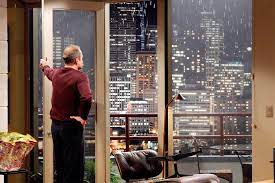

This is a EDA related to housing market analysis in King County, USA. 

We start importing the relevant libraries.

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Reading the data and having a look at the size of the dataset.

In [44]:
# first info data frame
df = pd.read_csv("data/eda.csv")
df.shape # (21597, 21)
#df.head()
#df.loc[:,"grade":"sqft_basement"]
#df.columns


(21597, 21)

Data type information and missing values...

In [4]:
# missing values (columns? observations?)
df.info() # incomplete columns: waterfront,view,sqft_basement,yr_renovated. Dates need format
# features
#numerical discrete - bedrooms, bathrooms, floors, waterfront, view, condition,grade
#numerical continuous: 
#categorical: none

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [5]:
#changing format date

df.date = pd.to_datetime(df.date,format='%Y-%m-%d')
#adding year feature
#df["year"] = df.date.dt.year

#df.info()
# oldest and newest sale
#print(min(df.year),max(df.year))



In [6]:
# searching for duplicates
#df["id"].duplicated().value_counts()
df[df["id"].duplicated()].shape

(177, 21)

In [7]:
# inserting new column of price/sqft_living (total inner space)
df.eval('price_sqft = price/sqft_living',inplace=True)

In [8]:
#df.columns
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,price_sqft
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574,264.143
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000,87.588
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000,182.292
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000,244.645
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000,318.333
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000,810.139
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140,110.000


## Questions and hypothesis relevant for my client needs

### Price
#### 1)
Q: Is the price per squared foot correlated with neighborhood? 

H: There are gonna be neighborhoods where more affordable houses are concentrated. 

#### 2)
Q: Are "grades" and "condition", both parameters having an impact in the final price, positively correlated with the price per squared foot? 

H: Grades (higher grade = higher construction quality) should be positively correlated with the price. More affordable houses have a worst condition. 

#### 3)
Q: Are newer houses (yr_built) and recently renovated houses (yr_renovated) more expensive? 

H: Newer houses should not be necessarily more expensive but recently renovated should be more expensive given that there is an investment involved.

### Space
#### 4)
Q: Are affordable houses with more bedrooms concentrated in particular neighborhoods?

H: They are in the suburbs

### Nice neighborhood
#### 5)
Q: From the neighborhoods with the most affordable options, are there "nicer" neighborhoods than others?

H: There will be differences in terms of crime rates, school quality, proximity to parks, larger living areas
#### 6)
Q: Are houses with waterfront necessarily more expensive?

H: They are because this feature increases the desirability of the neighborhood.

#### 7)
Q: Are newer and recently renovated houses (indicator of ongoing investment= nicer neighborhood) present in the more affordable neighborhoods?

H: They can be distributed in all districts


In [9]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft'],
      dtype='object')

# trying hypotheses

### Price
#### 1)
Q: Is the price per squared foot correlated with neighborhood? 

H: There are gonna be neighborhoods where more affordable houses are concentrated. 

In [10]:
#plotting price per squared foot distribution in space

import plotly.express as px


fig = px.scatter_mapbox(df, lat="lat", lon="long", color='price_sqft', color_continuous_scale=px.colors.sequential.Inferno, zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Affordable neighborhoods are distributed around the center of Seattle, with the southern part concentrating the lower prices.

In [11]:
df["price_sqft"].describe()

count   21597.000
mean      264.143
std       110.000
min        87.588
25%       182.292
50%       244.645
75%       318.333
max       810.139
Name: price_sqft, dtype: float64


### range of prices per sqft:

in terms of percentiles:

    min        25%      50%(median)      75%         max
    
87.588 - 182.292 - 244.645 - 318.333 - 810.139

--> that implies that the group of houses with prices lower than 182.292 could be labeled as affordable. A quarter of the houses of the dataset have prices lower than that.

### where are located the houses of the 25th percentile?

In [12]:
#lower prices data frame
first_quad = 182.300
df2 = df[df["price_sqft"] < first_quad]

fig = px.scatter_mapbox(df2, lat="lat", lon="long", color='price_sqft', color_continuous_scale=px.colors.sequential.Inferno, zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Text(0.5, 1.0, 'Distribution of price_sqft')

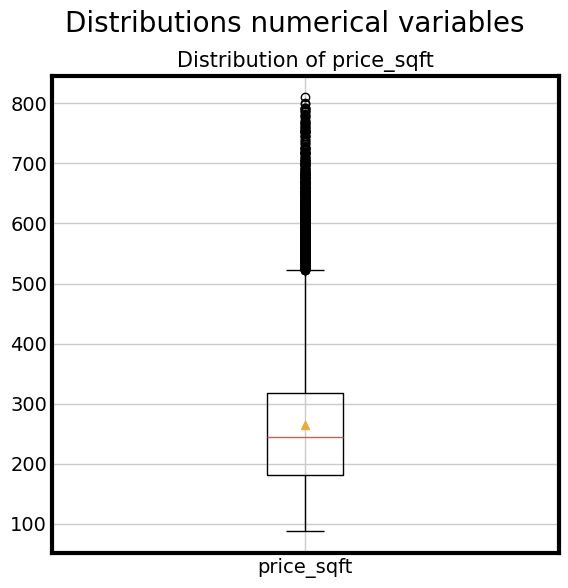

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,6)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distributions numerical variables', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
#plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax.boxplot(x = df['price_sqft'],showmeans=True) # creates boxplot for number of views
ax.set_xticklabels(labels=["price_sqft"]) # sets the label for the ticks on the x-axis
#ax[0][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax.set_title("Distribution of price_sqft", fontsize = 15) # sets title for subplot

#fig.delaxes(ax[1][2]);

Text(0.5, 1.0, 'Distribution of price per square foot')

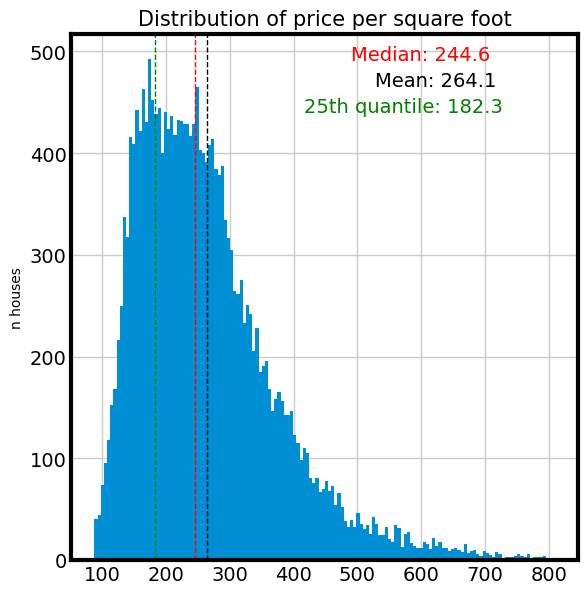

In [42]:
nbins = int(np.sqrt(df.shape[0]))
fig, ax = plt.subplots(1,1, figsize=(6,6)) # create subplots on 2 rows and 3 columns
#plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
#plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax.hist(x=df['price_sqft'], bins=nbins)  # creates histogram for number of views
ax.set_ylabel("n houses", fontsize = 10) # sets the label y-axis
ax.axvline(df['price_sqft'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()

ax.text(df['price_sqft'].mean()*2, max_ylim*0.9, 'Mean: {:.1f}'.format(df['price_sqft'].mean()))
ax.axvline(df['price_sqft'].median(), color='r', linestyle='dashed', linewidth=1)
ax.text(df['price_sqft'].median()*2, max_ylim*0.95, 'Median: {:.1f}'.format(df['price_sqft'].median()),color='r')
ax.axvline(df['price_sqft'].quantile(0.25), color='g', linestyle='dashed', linewidth=1)
ax.text(df['price_sqft'].quantile()*1.7, max_ylim*0.85, '25th quantile: {:.1f}'.format(df['price_sqft'].quantile(0.25)),color='g')
#ax.set_xlim(0,1000000) # limits the x-axis values from 0 to 1000000 
ax.set_title("Distribution of price per square foot", fontsize = 15)

The distribution is right skewed. What about the features? Let's remember that the features with missing values are: waterfront,view,sqft_basement,yr_renovated.
The columns are: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft']


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'pric

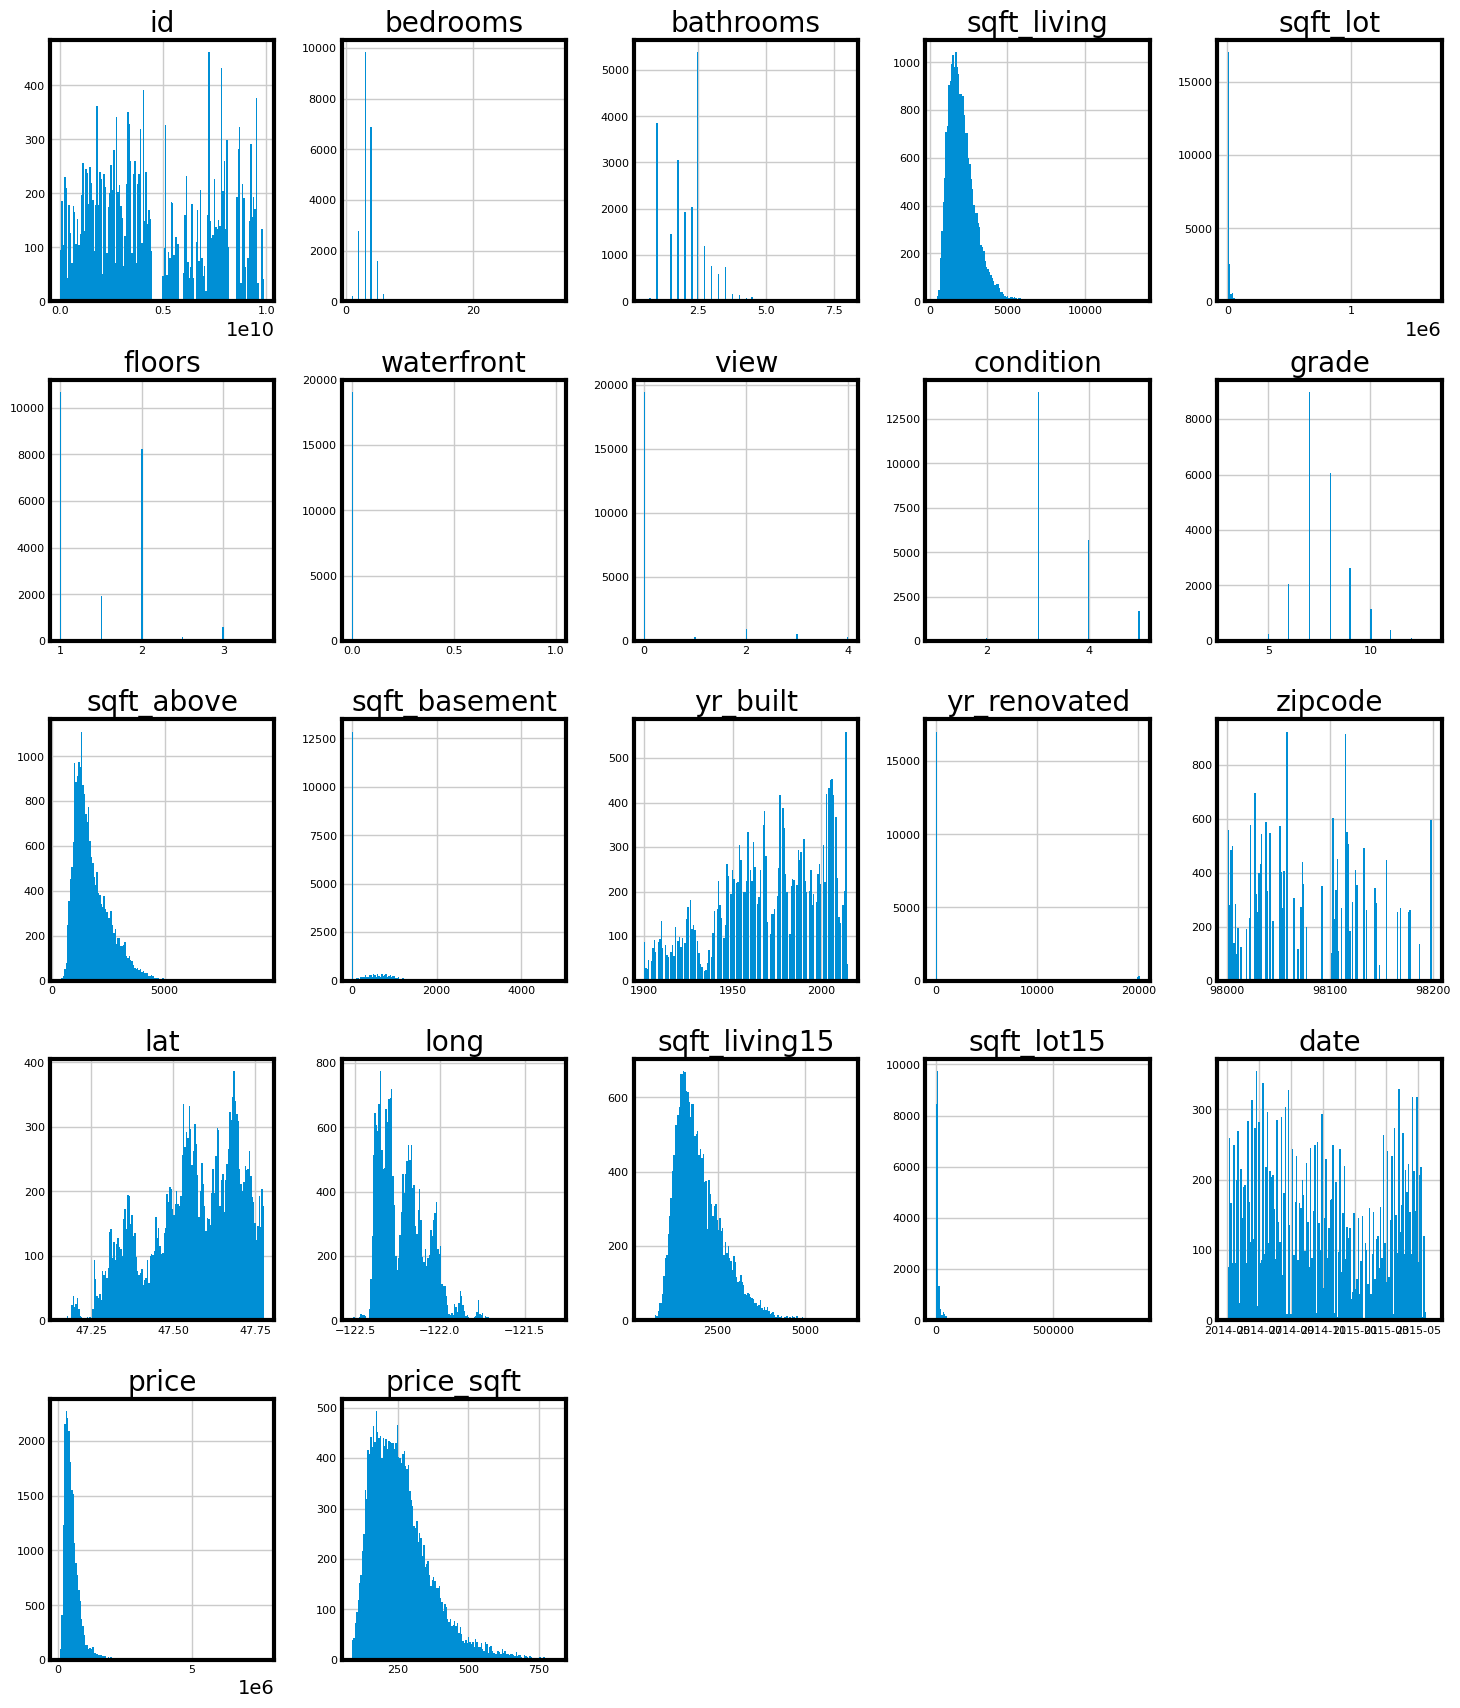

In [15]:
# I will create a list of the columns I'm interested to see distribution. 
#sqft_living is contained in price_sqft and thus removed.
features = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_sqft']
df.hist(figsize=(16, 20), bins=int(np.sqrt(df.shape[0])), xlabelsize=8, ylabelsize=8)

#### 2)
Q: Are "grades" and "condition", both parameters having an impact in the final price, positively correlated with the price per squared foot? 

H: Grades (higher grade = higher construction quality) should be positively correlated with the price. More affordable houses have a worst condition. 


In [48]:
# min max grades in this dataset
df.grade.min()
#df.grade.max()


3

## info columns important for the case

### grades: 
important because our client cannot  pay for a high grade house. 

Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.) . Source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

### condition: 
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 



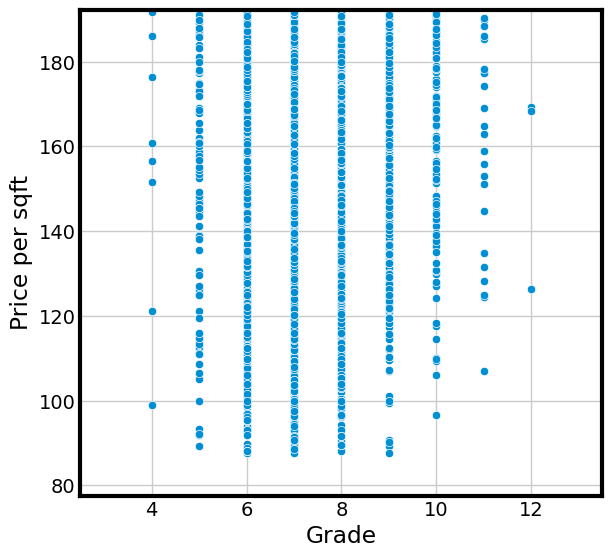

In [16]:
# are the grades correlated with the price?
#constrained_layout=True,

fig, ax = plt.subplots(figsize=(6, 6),  dpi=100)

sns.scatterplot(data=df, x="grade", y="price_sqft", ax = ax)

#ax.xaxis.label.set_size(10)
#ax.yaxis.label.set_size(10)

ax.set(
    xlabel = "Grade",
    ylabel = "Price per sqft",
    #xlim = (-10, 22),
    ylim = (min(df["price_sqft"])-10, first_quad+10)
)

#ax.set_aspect('equal')
#plt.title("Weekly max. and min. temperatures in years 2012-2015",
#          color = "C1",
#          fontdict = {'size':10, }
#          )
#plt.legend()
plt.show()


--> there are affordable prices for grades lower than 11

In [17]:
#testing that 25% of houses have prices lower than first_quad
df2.shape[0] # 5402

5402

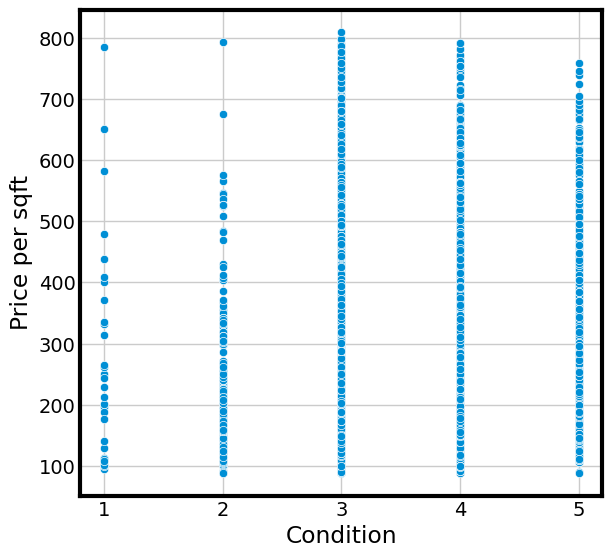

In [18]:
# are the grades correlated with the price?
#constrained_layout=True,

fig, ax = plt.subplots(figsize=(6, 6),  dpi=100)

sns.scatterplot(data=df, x="condition", y="price_sqft", ax = ax)

#ax.xaxis.label.set_size(10)
#ax.yaxis.label.set_size(10)

ax.set(
    xlabel = "Condition",
    ylabel = "Price per sqft"
    #xlim = (-10, 22),
    #ylim = (min(df["price_sqft"])-10, first_quad+10)
)

#ax.set_aspect('equal')
#plt.title("Weekly max. and min. temperatures in years 2012-2015",
#          color = "C1",
#          fontdict = {'size':10, }
#          )
#plt.legend()
plt.show()


not strong correlation between condition and price, although there are no many expensive houses with low condition numbers 1 or 2.

#### 3)
Q: Are newer houses (yr_built) and recently renovated houses (yr_renovated) more expensive? 

H: Newer houses should not be necessarily more expensive but recently renovated should be more expensive given that there is an investment involved.

From the correlation matrix we infer that there is no high correlation between price and year renovated or built. I would not apply a filter using these variables 

So far and in terms of budget, I would limit my search to the following group:
- price lower than 25th percentile
- condition 3, 4, 5
- grade in range 3-10

In [49]:
# from these 5402 houses, which have condition 3,4,5 (do not require much repairing = money)
df_budget = df2[df2["condition"].isin([3,4,5]) & df2["grade"].between(3,10,inclusive="both")]
print(df_budget.shape,df2.shape)
print(df.shape)
 # 3278 - 3, 1623 - 4, 369 - 5

(5309, 22) (5402, 22)
(21597, 21)


### Space
#### 4)
Q: Are affordable houses with more bedrooms concentrated in particular neighborhoods?

H: They are in the suburbs

[ 0  1  2  3  4  5  6  7  8  9 10]


Text(0.5, 1.0, 'Distribution of bedrooms for budget houses group')

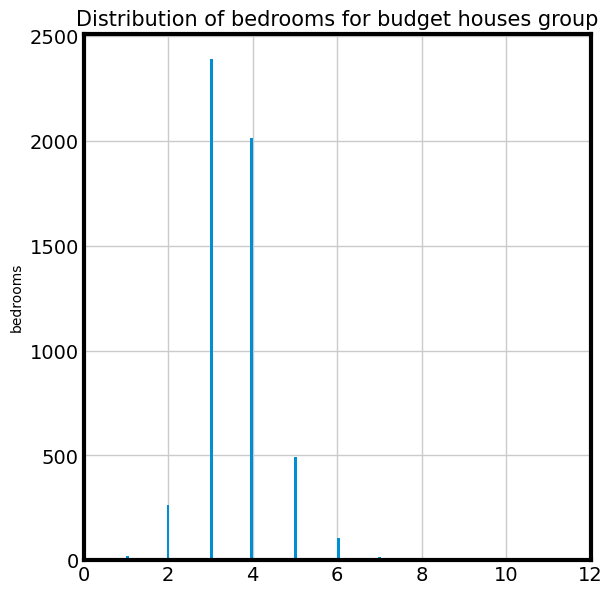

In [50]:
#distribution 

#from budget data frame
# bedrooms are negatively correlated with price -0.21,although the correlation is low
min_bedr = min(df_budget["bedrooms"])
max_bedr = max(df_budget["bedrooms"])
#df_bedrooms = df_budget[df["b"]]

x = np.arange(int(max_bedr))
print(x)
fig, ax = plt.subplots(1,1, figsize=(6,6)) # create subplots on 2 rows and 3 columns
#plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
#plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax.hist(df_budget.bedrooms,nbins)  
ax.set_ylabel("bedrooms", fontsize = 10) # sets the label y-axis
ax.set_xlim(0,max_bedr + 1) # limits the x-axis values from 0 to 1000000 
ax.set_title("Distribution of bedrooms for budget houses group", fontsize = 15)


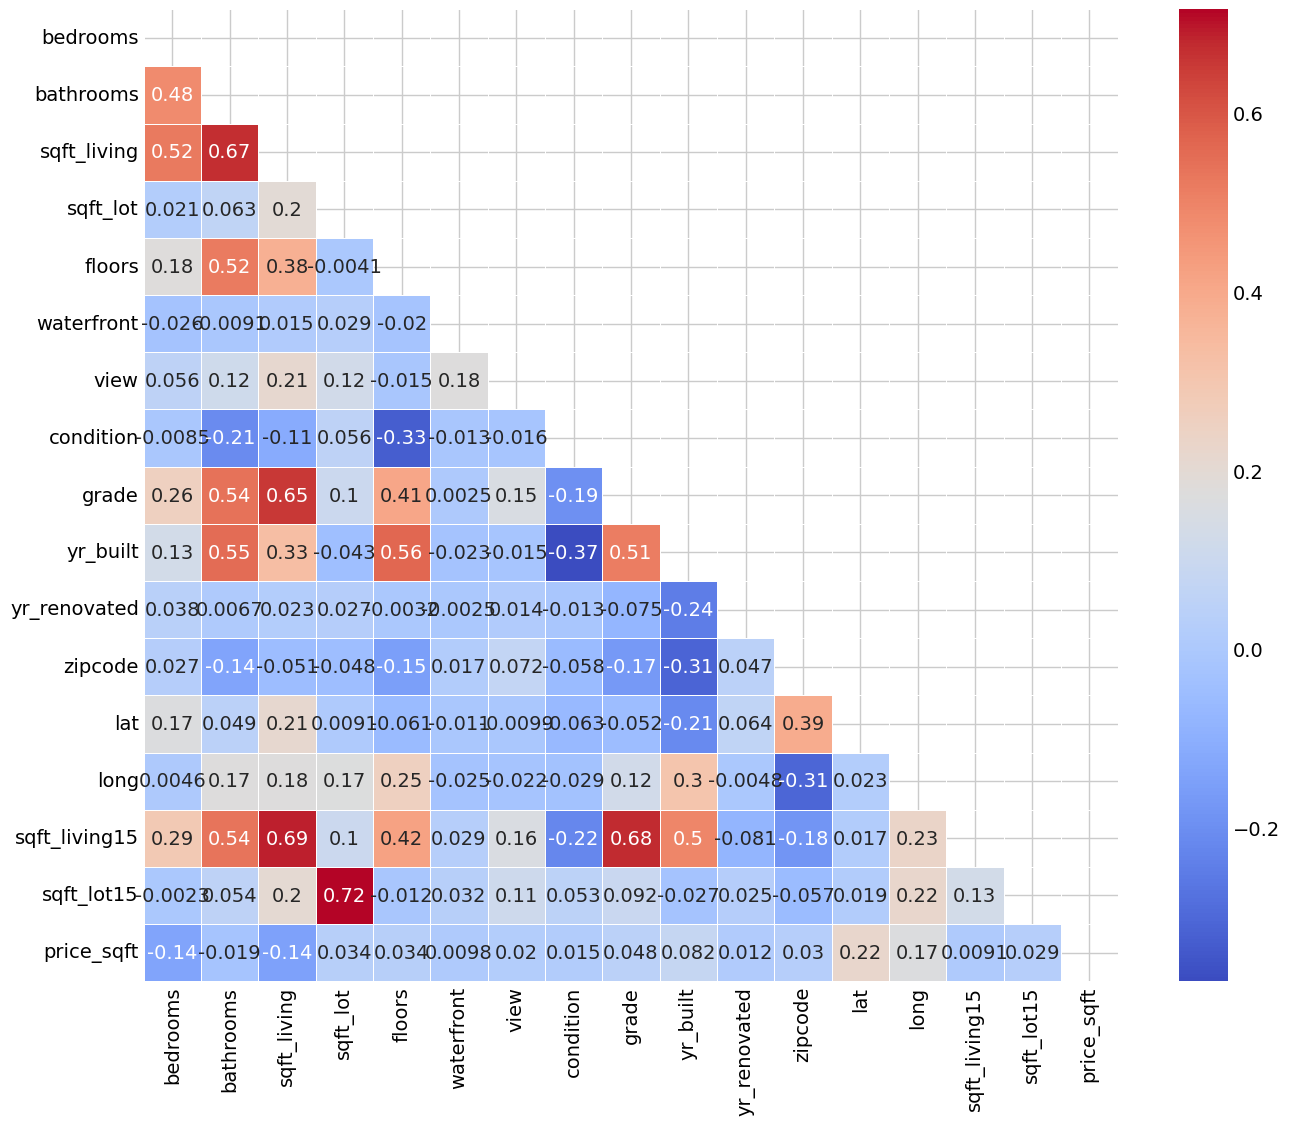

In [21]:
# correlation matrix
corr_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','price_sqft']

corr_mtrx=df_budget[corr_cols].corr()
mask = np.triu(np.ones_like(corr_mtrx, dtype=bool))


plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, mask=mask, linewidths=.5, annot=True, cmap='coolwarm')

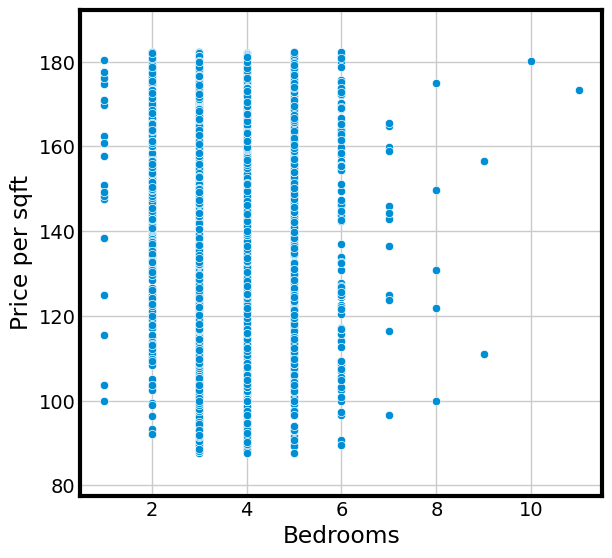

In [22]:
#correlation

fig, ax = plt.subplots(figsize=(6, 6),  dpi=100)

sns.scatterplot(data=df_budget, x="bedrooms", y="price_sqft", ax = ax)

#ax.xaxis.label.set_size(10)
#ax.yaxis.label.set_size(10)

ax.set(
    xlabel = "Bedrooms",
    ylabel = "Price per sqft",
    #xlim = (-10, 22),
    ylim = (min(df["price_sqft"])-10, first_quad+10)
)

#ax.set_aspect('equal')
#plt.title("Weekly max. and min. temperatures in years 2012-2015",
#          color = "C1",
#          fontdict = {'size':10, }
#          )
#plt.legend()
plt.show()



In [23]:
fig = px.scatter_mapbox(df_budget, lat="lat", lon="long", color='bedrooms', color_continuous_scale=px.colors.sequential.Inferno, zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [24]:
# is above + basement = living?
#df[["sqft_above","sqft_basement","sqft_living"]]
#df.query("sqft_living != sqft_above + sqft_basement")["sqft_basement"].shape #-->452
#df.query("sqft_living != sqft_above + sqft_basement")["sqft_basement"].isna().shape # --> 452
# this implies that above + basement = living


I don't see any clear spatial pattern for houses with more bedrooms. What about space?

In [25]:
fig = px.scatter_mapbox(df_budget, lat="lat", lon="long", color='sqft_living', color_continuous_scale=px.colors.sequential.Inferno, zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Nice neighborhood
#### 5)
Q: From the neighborhoods with the most affordable options, are there "nicer" neighborhoods than others?

H: There will be differences in terms of crime rates, school quality, proximity to parks, larger living areas
#### 6)
Q: Are houses with waterfront necessarily more expensive?

H: They are because this feature increases the desirability of the neighborhood.

#### 7)
Q: Are newer and recently renovated houses (indicator of ongoing investment= nicer neighborhood) present in the more affordable neighborhoods?

H: They can be distributed in all districts


In [26]:
df_budget["zipcode"] = df_budget["zipcode"].astype(str)
fig = px.scatter_mapbox(df_budget, lat="lat", lon="long", color='zipcode', zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
# get the zip codes of these neighborhoods

#df_budget["zipcode"].unique()


Not working altair code given bad json file :( ...

In [51]:
#import altair as alt
#file_geojson="Data/USCities.json"

#this object contains features of the json file given in the url. IMPORTANT: the second variable is equivalent to the object in json file 
# (check the key states1 in url_topojson, is the object we need that will be converted to a json feature collection) 
#king = alt.topo_feature(file_geojson, "zip_code")

#zip=alt.Chart(king).mark_geoshape(
    #fill='lightgray',
#    stroke='black'
#).encode(
#    color='properties.zip_code:N'
#).project(
#    'albersUsa'
#).properties(
#    width=500,
#    height=400
#)

#zip
